In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
# Load dataset (CSV)
df = pd.read_csv("D:\Projects_JR\Full-Stack-Projects\AI_class\Decision Tree\heart_disease.csv")
print("Loaded shape:", df.shape)

Loaded shape: (908, 13)


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [18]:
# Standardize
df.replace({ 'TRUE': 1, 'FALSE': 0, 'Ture': 1, 'TURE': 1}, inplace=True)

In [19]:
# Map sex to 1/0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [ ]:
# Handle potential empty strings or commas in numeric fields like oldpeak
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

oldpeak    62
dtype: int64

# EDA

In [21]:
# Column data types
df.dtypes

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang         int64
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [23]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [24]:
df.describe()

,age,sex,trestbps,chol,thalch,exang,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,0.790749,133.430617,201.484581,135.957048,0.410793,0.891253,1.008811
std,9.158031,0.406998,20.401608,112.097949,26.804929,0.492249,1.093875,1.144436
min,29.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.750000,1.000000,120.000000,176.750000,118.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,224.000000,138.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,144.000000,270.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,200.000000,603.000000,202.000000,1.000000,6.200000,4.000000


In [25]:
# Handle missing values (impute with mean for numerical, mode for categorical)
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
target = 'num'

In [30]:
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

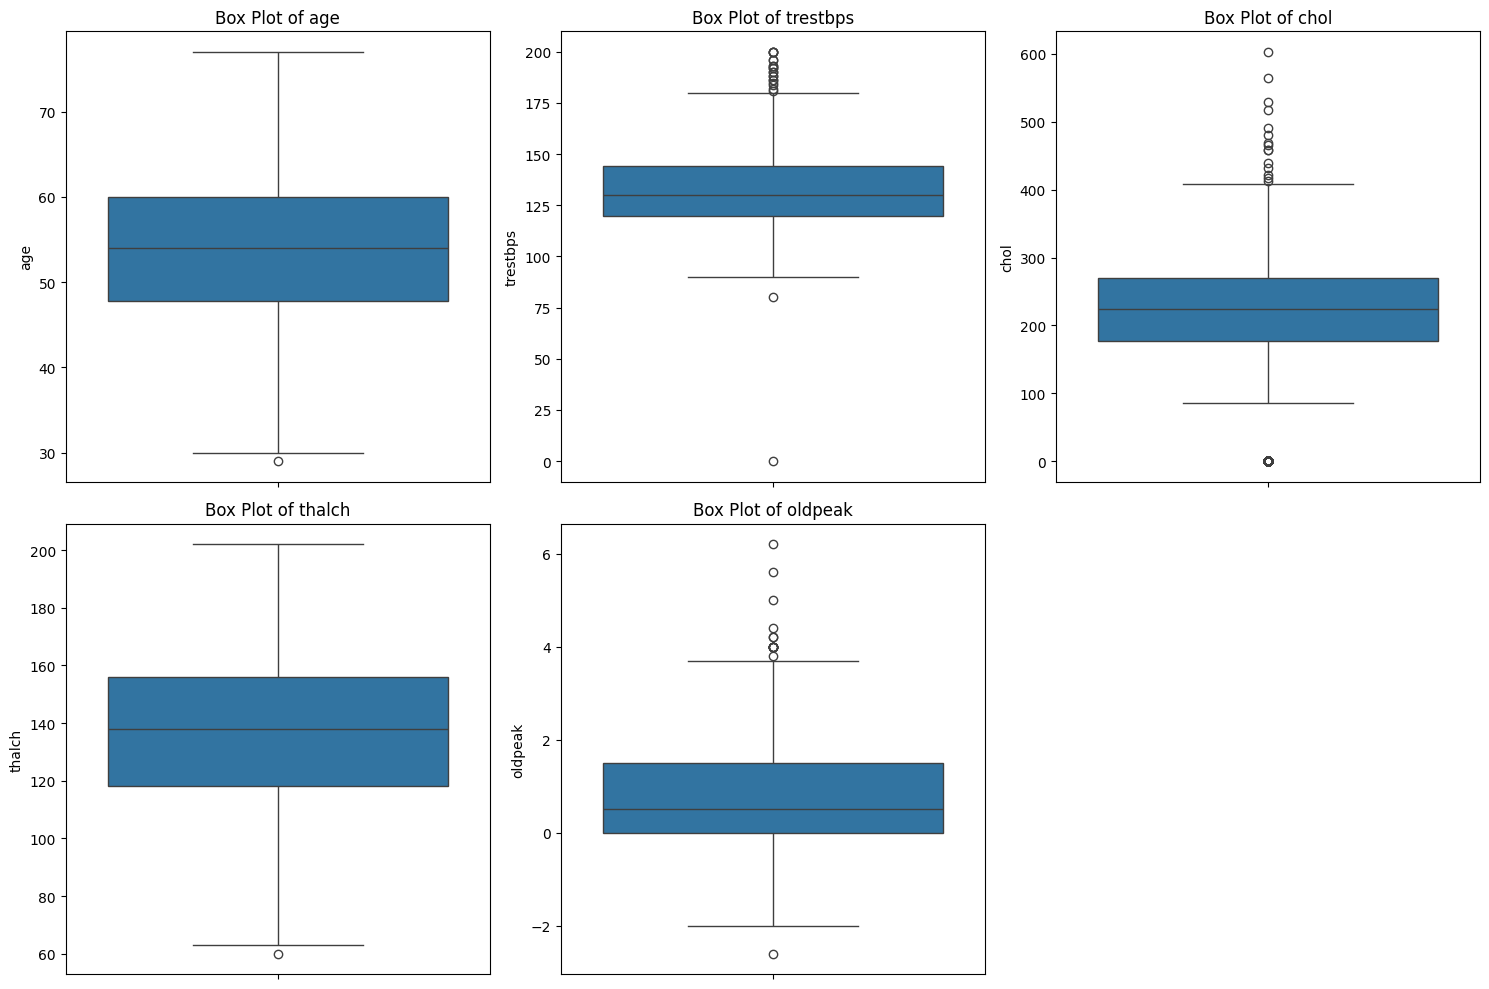

In [28]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

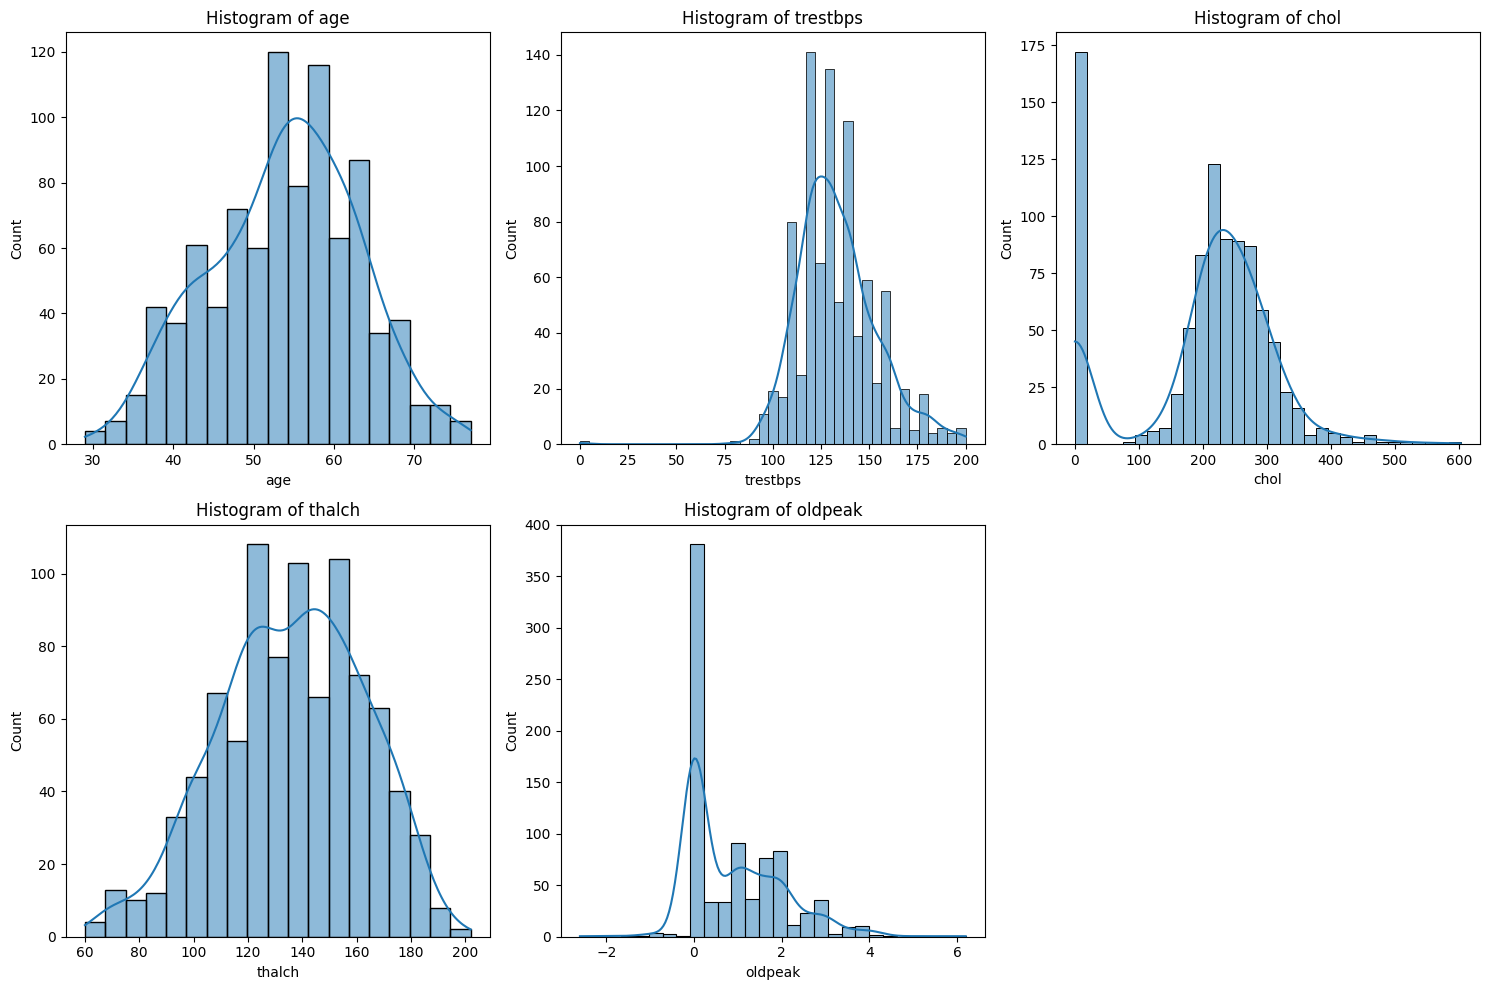

In [29]:
# Histograms for distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

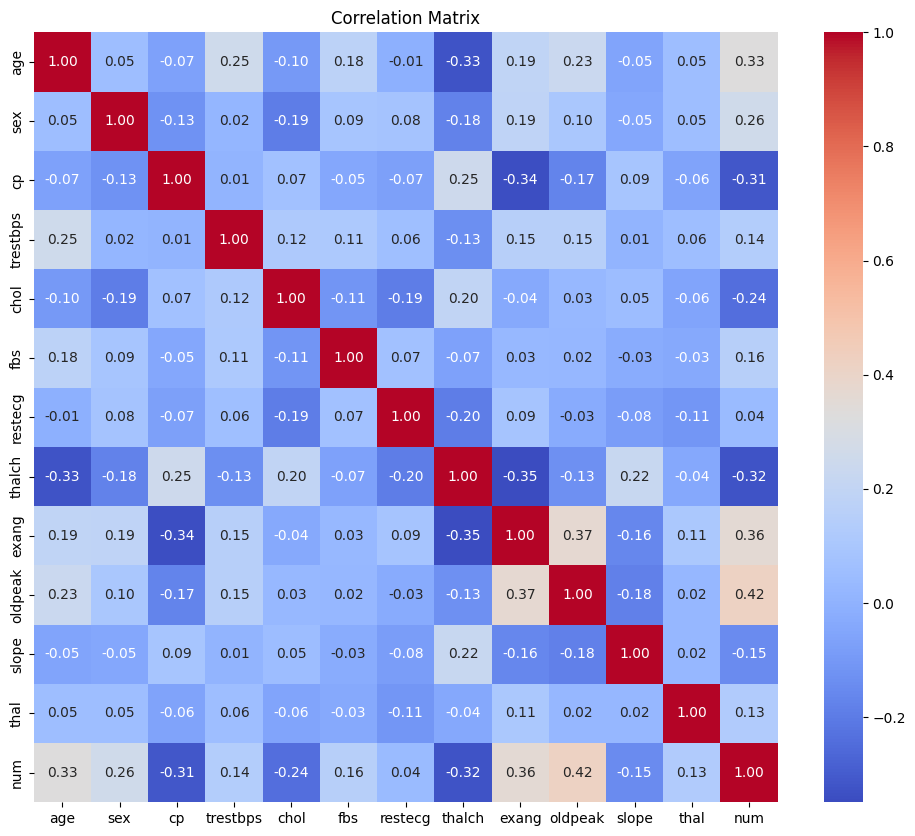

In [ ]:
# Correlation matrix (after encoding categoricals we are visualizing the correlation between the features)
df_encoded = df.copy()
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

corr = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

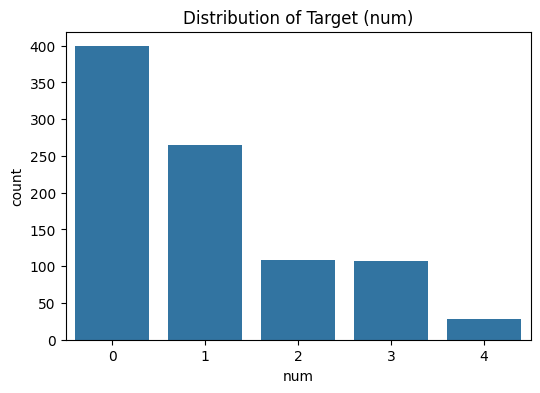

In [32]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df[target])
plt.title('Distribution of Target (num)')
plt.show()

# Feature Engineering

In [33]:
# Encode categorical variables using LabelEncoder (since Decision Tree can handle numerical inputs)
for col in cat_cols:
    df[col] = label_encoders[col].transform(df[col])

In [34]:
#Scale numerical features (optional for Decision Tree, but can help in some cases)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [35]:
# Features and target
X = df.drop(target, axis=1)
y = df[target]

In [37]:
# Split the dataset (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # For ROC-AUC


In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [39]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Performance:
Accuracy: 0.5330
Precision: 0.5101
Recall: 0.5330
F1-Score: 0.5205
ROC-AUC: 0.6009

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        89
           1       0.35      0.33      0.34        48
           2       0.38      0.41      0.39        22
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.34      0.34       182
weighted avg       0.51      0.53      0.52       182


Confusion Matrix:
 [[69 13  4  3  0]
 [18 16  8  6  0]
 [ 6  6  9  0  1]
 [ 3  8  1  3  2]
 [ 0  3  2  1  0]]


# Hyperparameter Tuning

In [40]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [47]:
# Get the best parameters and best score
best_dt_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)

best_score = grid_search.best_score_
print(f"Best Score: {best_score:.4f}")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.5359


In [ ]:
# Re-evaluate with best model
y_pred_best = best_dt_model.predict(X_test)
y_pred_proba_best = best_dt_model.predict_proba(X_test)

In [48]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best, multi_class='ovr')

In [49]:
print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))


Tuned Model Performance:
Accuracy: 0.5330
Precision: 0.5101
Recall: 0.5330
F1-Score: 0.5205
ROC-AUC: 0.6009

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        89
           1       0.35      0.33      0.34        48
           2       0.38      0.41      0.39        22
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.34      0.34       182
weighted avg       0.51      0.53      0.52       182



In [ ]:
# Feature importances
importances = best_dt_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_imp_df)


Feature Importances:
      Feature  Importance
2         cp    0.381152
4       chol    0.170208
0        age    0.157014
8      exang    0.083569
9    oldpeak    0.064334
3   trestbps    0.048822
7     thalch    0.042943
1        sex    0.040354
10     slope    0.011603
5        fbs    0.000000
6    restecg    0.000000
11      thal    0.000000


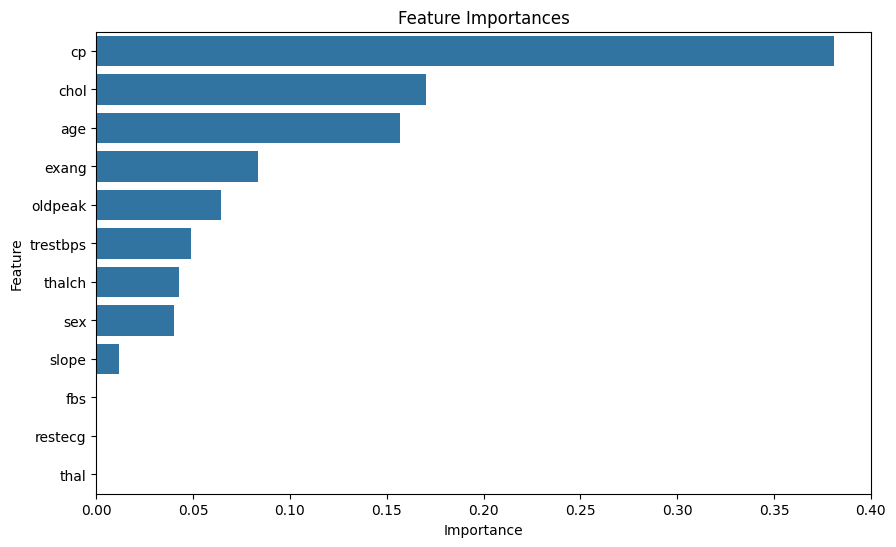

In [51]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importances')
plt.show()

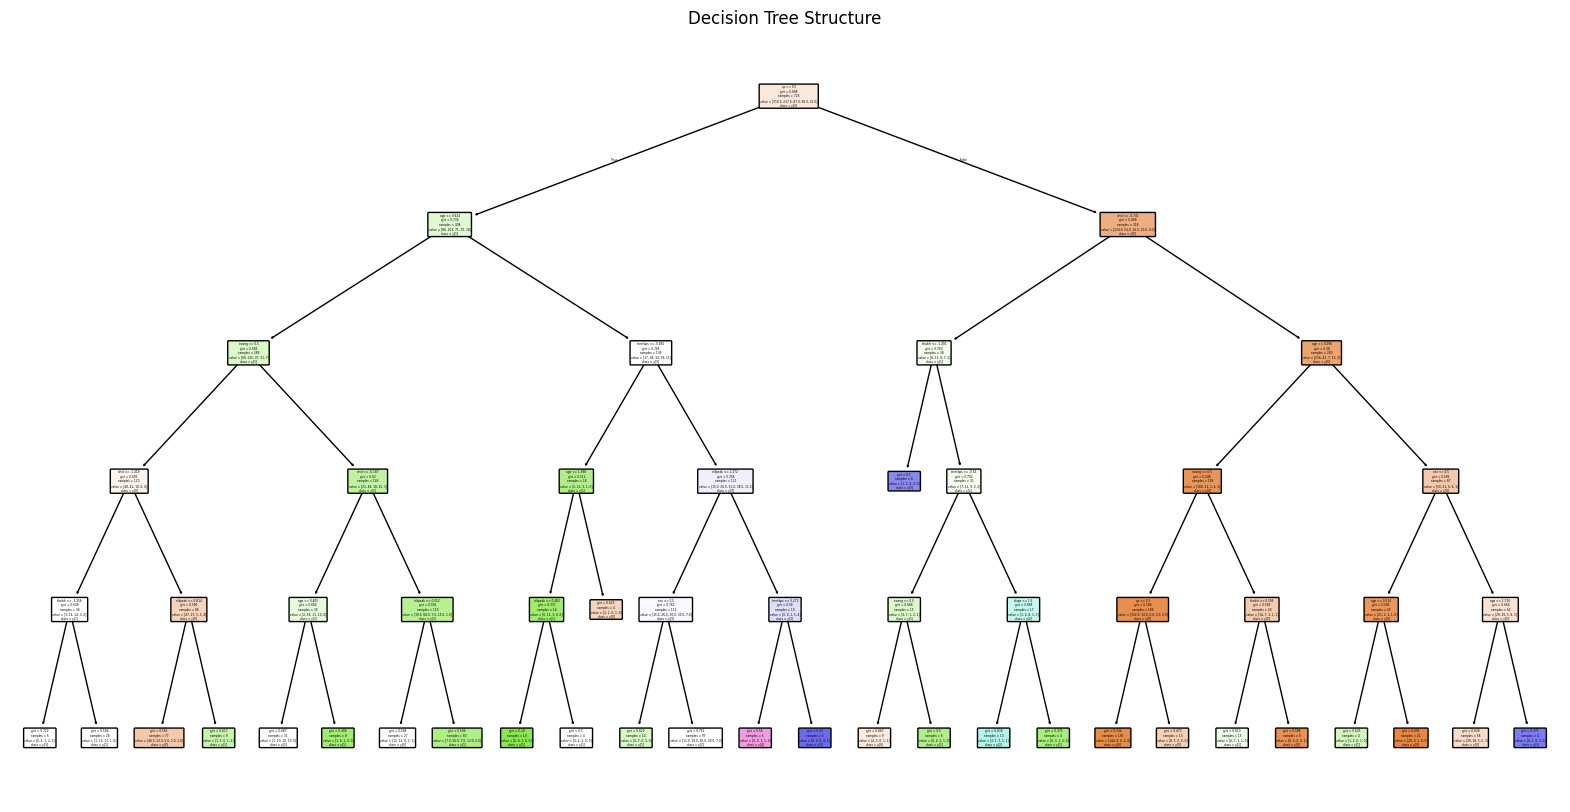

In [52]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()